# Given dataset - Employee.xlsx, calculate the following:
1.	Total no of employee (organization size) at each year end
2.	Average employee Tenure at each year end
3.	Attrition rate for each year (total no employee left in year / Total employee at year end)
4.	For each employee match email with first name and last name to get score for match to authenticate email belongs to person


## Output format:
 
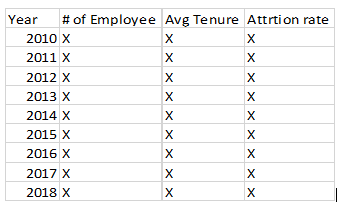

In [1]:
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
employee_df = pd.read_excel('Employee.xlsx')

In [3]:
employee_df.head(5)

,id,first_name,last_name,email,gender,DOJ,DOL
0,1,Karlen,Tacker,ktacker0@ning.com,Female,2010-05-08,2014-12-31
1,2,Rafaellle,Recher,rrecher1@google.com.hk,Male,2015-05-05,NaT
2,3,Evin,Rousell,erousell2@g.co,Male,2013-11-30,NaT
3,4,Roslyn,Cassella,rcassella3@walmart.com,Female,2016-05-21,NaT
4,5,Sky,Cashman,scashman4@homestead.com,Male,2015-11-10,NaT


In [4]:
employee_df.dtypes

id                     int64
first_name            object
last_name             object
email                 object
gender                object
DOJ           datetime64[ns]
DOL           datetime64[ns]
dtype: object

In [5]:
temp_employee_df = employee_df.copy(deep=True)

In [6]:
temp_employee_df.DOJ.isnull().sum()

0

In [7]:
temp_employee_df.DOL.isnull().sum()

482

In [8]:
temp_employee_df['DOJ'] = pd.to_datetime(temp_employee_df['DOJ'], errors='coerce')

In [9]:
temp_employee_df['YOJ'] = temp_employee_df.DOJ.apply(lambda x: dt.datetime.strftime(x, '%Y'))

In [10]:
temp_employee_df[['YOJ', 'DOJ']].head(5)

,YOJ,DOJ
0,2010,2010-05-08
1,2015,2015-05-05
2,2013,2013-11-30
3,2016,2016-05-21
4,2015,2015-11-10


In [11]:
def extract_year(dol_list):
    try:
        x = dt.datetime.strftime(dol_list, '%Y')
        return x
    except:
        None

In [12]:
temp_employee_df['YOL'] = temp_employee_df.DOL.apply(extract_year)

In [13]:
temp_employee_df[['YOL', 'DOL']].head(5)

,YOL,DOL
0,2014,2014-12-31
1,None,NaT
2,None,NaT
3,None,NaT
4,None,NaT


In [14]:
temp_employee_df.YOJ.value_counts().sort_index().cumsum(axis = 0)

2010     122
2011     271
2012     389
2013     531
2014     645
2015     752
2016     874
2017     989
2018    1000
Name: YOJ, dtype: int64

In [15]:
temp_employee_df.YOL.value_counts().sort_index().cumsum(axis = 0)

2010      4
2011     32
2012     70
2013    124
2014    203
2015    300
2016    397
2017    497
2018    518
Name: YOL, dtype: int64

In [16]:
temp_employee_df.YOJ.value_counts().sort_index().cumsum(axis = 0).subtract(temp_employee_df.YOL.value_counts().sort_index().cumsum(axis = 0))

2010    118
2011    239
2012    319
2013    407
2014    442
2015    452
2016    477
2017    492
2018    482
dtype: int64

In [17]:
answer_df = pd.DataFrame(temp_employee_df.YOJ.value_counts().sort_index().cumsum(axis = 0).subtract(temp_employee_df.YOL.value_counts().sort_index().cumsum(axis = 0)))

In [18]:
answer_df.rename(columns = {0: 'No_of_employees'}, inplace=True)

# Answer to Problem #1
## Formula: No. of employees at end of year x = Cumulative sum of all employees who have joined between the year 2010 and year x (inclusive) - Cumulative sum of all employees who have left between the year 2010 and year x (inclusive)

In [19]:
answer_df.head(10)

,No_of_employees
2010,118
2011,239
2012,319
2013,407
2014,442
2015,452
2016,477
2017,492
2018,482


In [20]:
temp_employee_df.dtypes

id                     int64
first_name            object
last_name             object
email                 object
gender                object
DOJ           datetime64[ns]
DOL           datetime64[ns]
YOJ                   object
YOL                   object
dtype: object

In [21]:
pd.datetime.date(dt.datetime.strptime('21-07-2020', '%d-%m-%Y'))

datetime.date(2020, 7, 21)

In [22]:
current_year = '2010'
pd.datetime.date(dt.datetime.strptime('31-12-{}'.format(current_year), '%d-%m-%Y'))

datetime.date(2010, 12, 31)

In [23]:
print(temp_employee_df.loc[1, 'DOL'].date())
print(type(temp_employee_df.loc[1, 'DOL'].date()))

NaT
<class 'pandas._libs.tslibs.nattype.NaTType'>


In [24]:
print(pd.NaT)
print(type(pd.NaT))

NaT
<class 'pandas._libs.tslibs.nattype.NaTType'>


In [25]:
print(np.datetime64('NaT'))
print(type(np.datetime64('NaT')))

NaT
<class 'numpy.datetime64'>


In [26]:
temp_employee_df.loc[1, 'DOL'].date() == pd.NaT

False

In [27]:
pd.isnull(temp_employee_df.loc[1, 'DOL'].date())

True

In [28]:
def get_tenure(row, current_year):
    print("----------------------------")
    print("Email ID: {}".format(row['email']))
    doj = row['DOJ'].date()
    dol = row['DOL'].date()
    yoj = row['YOJ']
    yol = row['YOL']
    print("DOJ: {}".format(doj))
    print("DOL: {}".format(dol))
    print("YOJ: {}".format(yoj))
    print("YOL: {}".format(yol))
    print("Current Year: {}".format(current_year))
    if yoj > current_year:
        print("YOJ > Current Year, output: {}".format(None))
        return None
    elif yol is not None and yol < current_year:
        print("YOL < Current Year, output: {}".format(None))
        return None
    else:
        if pd.isnull(dol):
            print("DOL is None")
            print("Last date of Current Year: {}".format(pd.datetime.date(dt.datetime.strptime('31-12-{}'.format(current_year), '%d-%m-%Y'))))
            print("Difference between Last Date of Current Year and DOJ: {}".format((pd.datetime.date(dt.datetime.strptime('31-12-{}'.format(current_year), '%d-%m-%Y')) - doj).days))
            return (pd.datetime.date(dt.datetime.strptime('31-12-{}'.format(current_year), '%d-%m-%Y')) - doj).days
        else:
            print("DOL is not None")
            print("Last date of Current Year: {}".format(pd.datetime.date(dt.datetime.strptime('31-12-{}'.format(current_year), '%d-%m-%Y'))))
            print("Minimum of Last date of Current Year and DOL (Last Active Date of Current Year): {}".format(min([dol, pd.datetime.date(dt.datetime.strptime('31-12-{}'.format(current_year), '%d-%m-%Y'))])))
            print("Difference between Last Active Date of Current year and DOJ: {}".format(( min([dol, pd.datetime.date(dt.datetime.strptime('31-12-{}'.format(current_year), '%d-%m-%Y'))]) - doj).days))
            return ( min([dol, pd.datetime.date(dt.datetime.strptime('31-12-{}'.format(current_year), '%d-%m-%Y'))]) - doj).days #/ np.timedelta64(1, 'D')

In [29]:
# temp_employee_df = temp_employee_df.loc[0:5, :]
# temp_employee_df.head()

In [30]:
for current_year in ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']:
    temp_employee_df['tenure_sum_in_{}'.format(current_year)] = temp_employee_df.apply(lambda row: get_tenure(row, current_year), axis=1)

----------------------------
Email ID: ktacker0@ning.com
DOJ: 2010-05-08
DOL: 2014-12-31
YOJ: 2010
YOL: 2014
Current Year: 2010
DOL is not None
Last date of Current Year: 2010-12-31
Minimum of Last date of Current Year and DOL (Last Active Date of Current Year): 2010-12-31
Difference between Last Active Date of Current year and DOJ: 237
----------------------------
Email ID: rrecher1@google.com.hk
DOJ: 2015-05-05
DOL: NaT
YOJ: 2015
YOL: None
Current Year: 2010
YOJ > Current Year, output: None
----------------------------
Email ID: erousell2@g.co
DOJ: 2013-11-30
DOL: NaT
YOJ: 2013
YOL: None
Current Year: 2010
YOJ > Current Year, output: None
----------------------------
Email ID: rcassella3@walmart.com
DOJ: 2016-05-21
DOL: NaT
YOJ: 2016
YOL: None
Current Year: 2010
YOJ > Current Year, output: None
----------------------------
Email ID: scashman4@homestead.com
DOJ: 2015-11-10
DOL: NaT
YOJ: 2015
YOL: None
Current Year: 2010
YOJ > Current Year, output: None
----------------------------
Ema

In [31]:
temp_employee_df.head(10)

,id,first_name,last_name,email,gender,DOJ,DOL,YOJ,YOL,tenure_sum_in_2010,tenure_sum_in_2011,tenure_sum_in_2012,tenure_sum_in_2013,tenure_sum_in_2014,tenure_sum_in_2015,tenure_sum_in_2016,tenure_sum_in_2017,tenure_sum_in_2018
0,1,Karlen,Tacker,ktacker0@ning.com,Female,2010-05-08,2014-12-31,2010,2014,237.0,602.0,968.0,1333.0,1698.0,NaN,NaN,NaN,NaN
1,2,Rafaellle,Recher,rrecher1@google.com.hk,Male,2015-05-05,NaT,2015,None,NaN,NaN,NaN,NaN,NaN,240.0,606.0,971.0,1336.0
2,3,Evin,Rousell,erousell2@g.co,Male,2013-11-30,NaT,2013,None,NaN,NaN,NaN,31.0,396.0,761.0,1127.0,1492.0,1857.0
3,4,Roslyn,Cassella,rcassella3@walmart.com,Female,2016-05-21,NaT,2016,None,NaN,NaN,NaN,NaN,NaN,NaN,224.0,589.0,954.0
4,5,Sky,Cashman,scashman4@homestead.com,Male,2015-11-10,NaT,2015,None,NaN,NaN,NaN,NaN,NaN,51.0,417.0,782.0,1147.0
5,6,Leslie,M'Chirrie,lmchirrie5@pinterest.com,Male,2010-06-19,2013-08-15,2010,2013,195.0,560.0,926.0,1153.0,NaN,NaN,NaN,NaN,NaN
6,7,Morley,Reith,mreith6@istockphoto.com,Male,2015-09-25,NaT,2015,None,NaN,NaN,NaN,NaN,NaN,97.0,463.0,828.0,1193.0
7,8,Alexandr,Greader,agreader7@wikipedia.org,Male,2015-06-12,NaT,2015,None,NaN,NaN,NaN,NaN,NaN,202.0,568.0,933.0,1298.0
8,9,Chiarra,Newgrosh,cnewgrosh8@google.com.au,Female,2012-06-24,2014-04-27,2012,2014,NaN,NaN,190.0,555.0,672.0,NaN,NaN,NaN,NaN
9,10,Layne,Dillet,ldillet9@flickr.com,Female,2014-07-17,NaT,2014,None,NaN,NaN,NaN,NaN,167.0,532.0,898.0,1263.0,1628.0


In [32]:
print("Number of active employees: ", "\tSum of Tenure of employees: ")
no_active_employees_list, sum_tenure_employees_list = list(), list()
for current_year in ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']:
    no_active_employees_list.append(temp_employee_df['tenure_sum_in_{}'.format(current_year)].notnull().sum())
    sum_tenure_employees_list.append(temp_employee_df['tenure_sum_in_{}'.format(current_year)].sum())
    print(temp_employee_df['tenure_sum_in_{}'.format(current_year)].notnull().sum(), "\t\t\t\t", temp_employee_df['tenure_sum_in_{}'.format(current_year)].sum())

Number of active employees:  	Sum of Tenure of employees: 
122 				 23872.0
267 				 87734.0
357 				 182375.0
461 				 295213.0
521 				 415388.0
549 				 511178.0
574 				 587703.0
592 				 629471.0
503 				 665601.0


In [33]:
print(no_active_employees_list)
print(sum_tenure_employees_list)

[122, 267, 357, 461, 521, 549, 574, 592, 503]
[23872.0, 87734.0, 182375.0, 295213.0, 415388.0, 511178.0, 587703.0, 629471.0, 665601.0]


In [34]:
tenure_sum_df = pd.DataFrame()
tenure_sum_df['year'] = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
tenure_sum_df['no_active_employees'] = no_active_employees_list
tenure_sum_df['sum_tenure_employees'] = sum_tenure_employees_list

In [35]:
tenure_sum_df.head(10)

,year,no_active_employees,sum_tenure_employees
0,2010,122,23872.0
1,2011,267,87734.0
2,2012,357,182375.0
3,2013,461,295213.0
4,2014,521,415388.0
5,2015,549,511178.0
6,2016,574,587703.0
7,2017,592,629471.0
8,2018,503,665601.0


In [36]:
answer_df['Average_tenure_in_days'] = tenure_sum_df['sum_tenure_employees'].values / tenure_sum_df['no_active_employees'].values

# Answer to Problem #2
## Formula: Average tenure of employees in year x (in days) = Sum of tenure of all employees who were active in the year x / Number of active employees in year x 
### where active employees in year x are the ones who have joined on or before year x and left on or after year x

In [37]:
answer_df.head(10)

,No_of_employees,Average_tenure_in_days
2010,118,195.672131
2011,239,328.591760
2012,319,510.854342
2013,407,640.375271
2014,442,797.289827
2015,452,931.107468
2016,477,1023.872822
2017,492,1063.295608
2018,482,1323.262425


In [38]:
temp_employee_df.YOL.value_counts().sort_index()

2010      4
2011     28
2012     38
2013     54
2014     79
2015     97
2016     97
2017    100
2018     21
Name: YOL, dtype: int64

In [39]:
temp_employee_df.YOL.value_counts().sort_index().values

array([  4,  28,  38,  54,  79,  97,  97, 100,  21])

In [40]:
answer_df['Attrition_rate'] = temp_employee_df.YOL.value_counts().sort_index().values / answer_df['No_of_employees']

In [41]:
answer_df.rename_axis('Year', inplace=True)

# Answer to Problem #3
## Formula: Attrition Rate in year x = Number of employees who left in year x / Number of employees at the end of year x

In [42]:
answer_df.head(10)

,No_of_employees,Average_tenure_in_days,Attrition_rate
Year,,,
2010,118,195.672131,0.033898
2011,239,328.591760,0.117155
2012,319,510.854342,0.119122
2013,407,640.375271,0.132678
2014,442,797.289827,0.178733
2015,452,931.107468,0.214602
2016,477,1023.872822,0.203354
2017,492,1063.295608,0.203252
2018,482,1323.262425,0.043568


In [43]:
answer_df.to_csv('answer_1_2_3.csv')

# Answer to Problem #4
## Levenshtein Distance Algorithm was used for fuzzy matching of strings
## Formula: email_match_score = max(fuzzy_match_score(first_name, email_name), fuzzy_match_score(last_name, email_name)),
### Both first name and last name are matched against the email id of any record since most of the records showed trend that one of either first name or last name is generally mentioned in the email id of the record.
### Only the part of the email id before "@" was considered for fuzzy matching.

In [44]:
# Reference: https://www.datacamp.com/community/tutorials/fuzzy-string-python
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions, insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        # print("The strings are {} edits away".format(distance[row][col]))
        return distance[row][col]

In [45]:
levenshtein_ratio_and_distance(s="abc".lower(), t="abd".lower(), ratio_calc = True)

0.6666666666666666

In [46]:
temp_employee_df.head(5)

,id,first_name,last_name,email,gender,DOJ,DOL,YOJ,YOL,tenure_sum_in_2010,tenure_sum_in_2011,tenure_sum_in_2012,tenure_sum_in_2013,tenure_sum_in_2014,tenure_sum_in_2015,tenure_sum_in_2016,tenure_sum_in_2017,tenure_sum_in_2018
0,1,Karlen,Tacker,ktacker0@ning.com,Female,2010-05-08,2014-12-31,2010,2014,237.0,602.0,968.0,1333.0,1698.0,NaN,NaN,NaN,NaN
1,2,Rafaellle,Recher,rrecher1@google.com.hk,Male,2015-05-05,NaT,2015,None,NaN,NaN,NaN,NaN,NaN,240.0,606.0,971.0,1336.0
2,3,Evin,Rousell,erousell2@g.co,Male,2013-11-30,NaT,2013,None,NaN,NaN,NaN,31.0,396.0,761.0,1127.0,1492.0,1857.0
3,4,Roslyn,Cassella,rcassella3@walmart.com,Female,2016-05-21,NaT,2016,None,NaN,NaN,NaN,NaN,NaN,NaN,224.0,589.0,954.0
4,5,Sky,Cashman,scashman4@homestead.com,Male,2015-11-10,NaT,2015,None,NaN,NaN,NaN,NaN,NaN,51.0,417.0,782.0,1147.0


In [47]:
def get_email_match_score(row):
    first_name = row['first_name'].lower()
    last_name = row['last_name'].lower()
    email_name = str(row['email']).split("@")[0].lower()
    
    first_name_match_score = levenshtein_ratio_and_distance(s=first_name, t=email_name, ratio_calc=True)
    last_name_match_score = levenshtein_ratio_and_distance(s=last_name, t=email_name, ratio_calc=True)
    match_score = max(first_name_match_score, last_name_match_score)
    
    return match_score

In [48]:
employee_df['email_match_score'] = temp_employee_df.apply(lambda row: get_email_match_score(row), axis=1)

In [49]:
employee_df.head(10)

,id,first_name,last_name,email,gender,DOJ,DOL,email_match_score
0,1,Karlen,Tacker,ktacker0@ning.com,Female,2010-05-08,2014-12-31,0.857143
1,2,Rafaellle,Recher,rrecher1@google.com.hk,Male,2015-05-05,NaT,0.857143
2,3,Evin,Rousell,erousell2@g.co,Male,2013-11-30,NaT,0.875000
3,4,Roslyn,Cassella,rcassella3@walmart.com,Female,2016-05-21,NaT,0.888889
4,5,Sky,Cashman,scashman4@homestead.com,Male,2015-11-10,NaT,0.875000
5,6,Leslie,M'Chirrie,lmchirrie5@pinterest.com,Male,2010-06-19,2013-08-15,0.842105
6,7,Morley,Reith,mreith6@istockphoto.com,Male,2015-09-25,NaT,0.833333
7,8,Alexandr,Greader,agreader7@wikipedia.org,Male,2015-06-12,NaT,0.875000
8,9,Chiarra,Newgrosh,cnewgrosh8@google.com.au,Female,2012-06-24,2014-04-27,0.888889
9,10,Layne,Dillet,ldillet9@flickr.com,Female,2014-07-17,NaT,0.857143


In [50]:
employee_df.loc[:, ['id', 'email_match_score']].to_csv('answer_4.csv', index = False)

# Answer - #1, #2, #3

In [51]:
answer_df

,No_of_employees,Average_tenure_in_days,Attrition_rate
Year,,,
2010,118,195.672131,0.033898
2011,239,328.591760,0.117155
2012,319,510.854342,0.119122
2013,407,640.375271,0.132678
2014,442,797.289827,0.178733
2015,452,931.107468,0.214602
2016,477,1023.872822,0.203354
2017,492,1063.295608,0.203252
2018,482,1323.262425,0.043568


# Answer - #4

In [52]:
employee_df.loc[:, ['id', 'email_match_score']].head(20)

,id,email_match_score
0,1,0.857143
1,2,0.857143
2,3,0.875000
3,4,0.888889
4,5,0.875000
5,6,0.842105
6,7,0.833333
7,8,0.875000
8,9,0.888889
9,10,0.857143
